In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Apply Gaussian Blur with varying kernel sizes

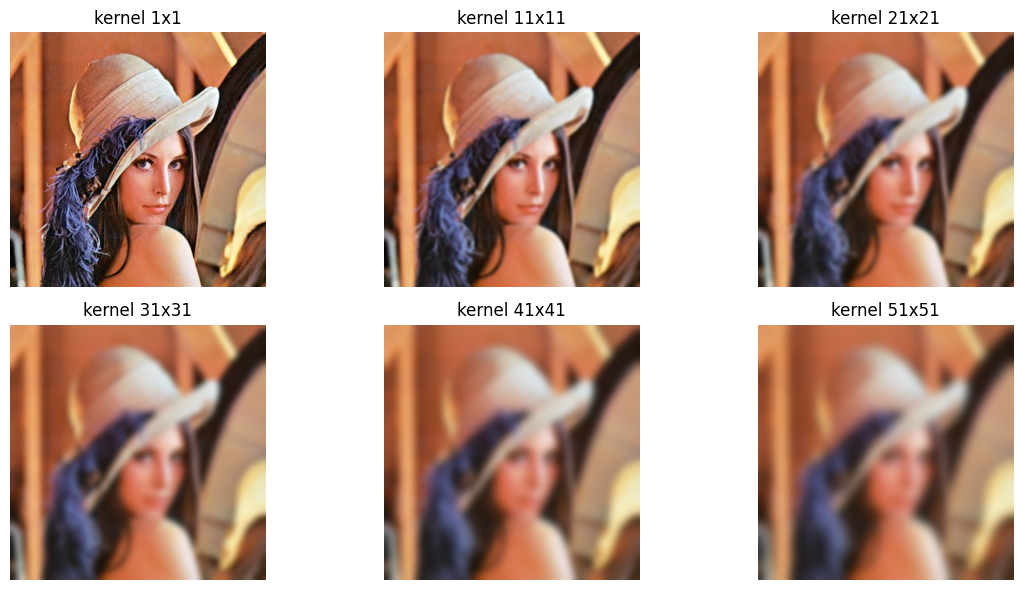

In [ ]:
# Load the Lenna image in color and convert to RGB (from BGR)
lenna = cv2.imread("Lenna_400.jpg")
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)

kernel_size = [1, 11, 21, 31, 41, 51]
plt.figure(figsize=(12,6))

for idx, k in enumerate(kernel_size):
    # Apply Gaussian Blur
    # Syntax: cv2.GaussianBlur(src, ksize, sigmaX)
    # ksize: Gaussian kernel size, must be odd and positive
    dst = cv2.GaussianBlur(lenna, (k, k), 0)

    # Plot blurred image
    plt.subplot(2, 3, idx + 1)
    plt.imshow(dst)
    plt.title(f"kernel {k}x{k}")
    plt.axis("off")

plt.tight_layout()
plt.show()

##  Apply Median Blur with different kernel sizes 

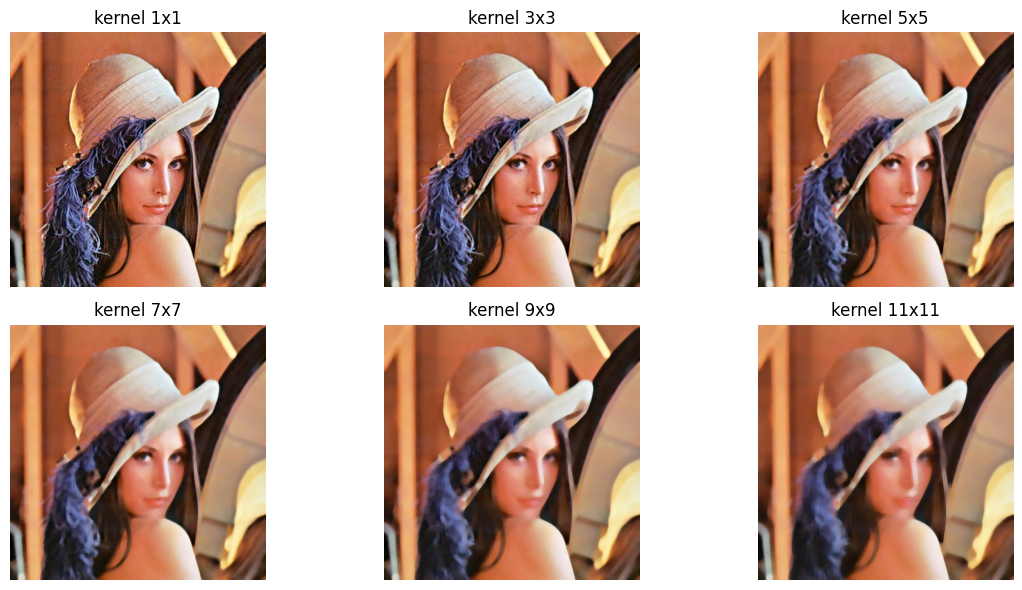

In [78]:
kernel_size = [1, 3, 5, 7, 9, 11]
plt.figure(figsize=(12, 6))

for idx, k in enumerate(kernel_size):
    # Median Blur doesn't affect the image when k = 1
    if k == 1:
        dst = lenna
    else:
        # Apply Median Blur: good for removing salt-and-pepper noise
        dst = cv2.medianBlur(lenna, k)

    plt.subplot(2, 3, idx + 1)
    plt.imshow(dst)
    plt.title(f"kernel {k}x{k}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Sobel Filter on Lenna & Circuit

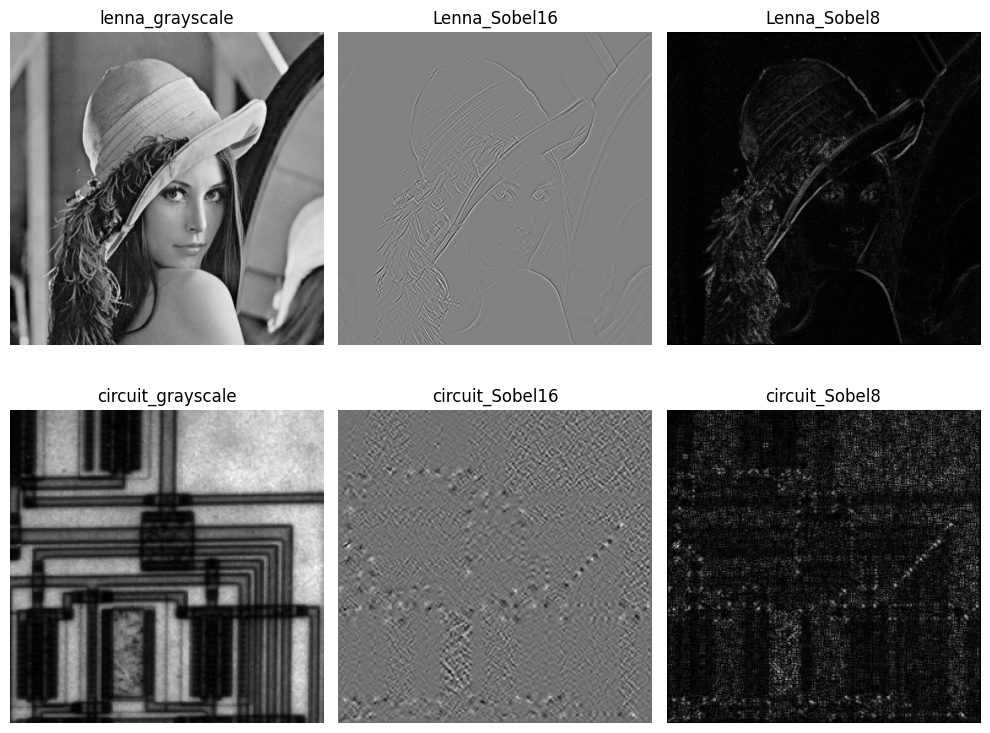

In [79]:
# Load grayscale images
lenna_grayscale = cv2.imread("lena.bmp", cv2.IMREAD_GRAYSCALE)
circuit_grayscale = cv2.imread("circuit.bmp", cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter with dx=1, dy=1 for diagonal edge detection
sobel16_lenna = cv2.Sobel(lenna_grayscale, ddepth=cv2.CV_16S, dx=1, dy=1, ksize=3)
sobel8_lenna = cv2.convertScaleAbs(sobel16_lenna)  # Convert 16-bit signed to 8-bit unsigned

sobel16_circuit = cv2.Sobel(circuit_grayscale, ddepth=cv2.CV_16S, dx=1, dy=1, ksize=3)
sobel8_circuit = cv2.convertScaleAbs(sobel16_circuit)

# Display results
images = [lenna_grayscale, sobel16_lenna, sobel8_lenna,
          circuit_grayscale, sobel16_circuit, sobel8_circuit]
titles = ["lenna_grayscale", "Lenna_Sobel16", "Lenna_Sobel8",
          "circuit_grayscale", "circuit_Sobel16", "circuit_Sobel8"]

plt.figure(figsize=(10, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

## Sobel Gradient Magnitude $(Gx^2 + Gy^2)^{0.5}$

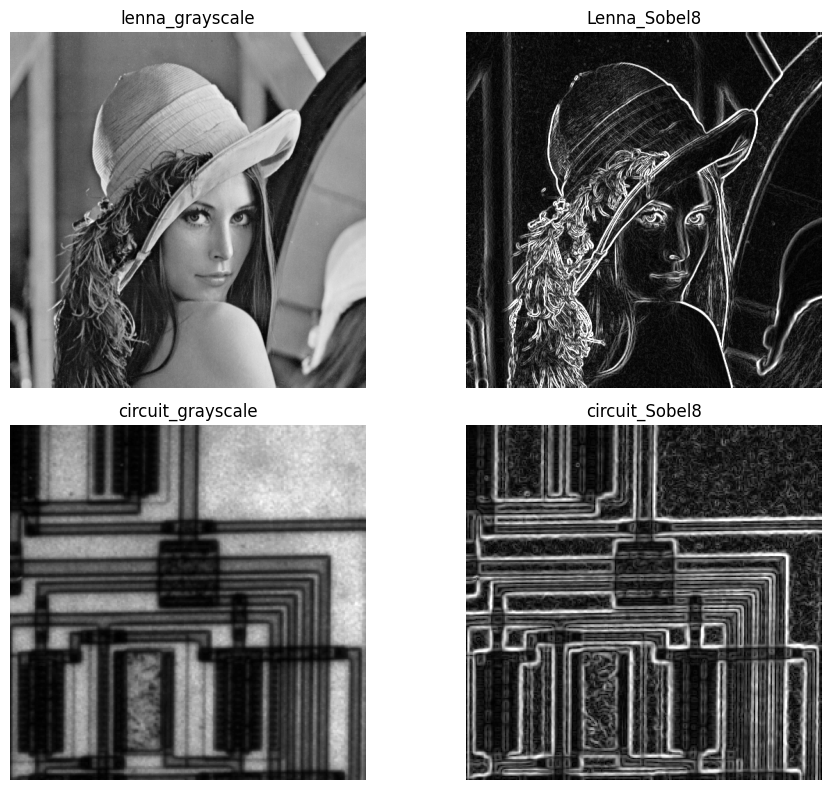

In [80]:
# Apply Sobel in x and y separately and compute gradient magnitude
sobel_x = cv2.Sobel(lenna_grayscale, cv2.CV_16S, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(lenna_grayscale, cv2.CV_16S, dx=0, dy=1, ksize=3)
sobel_lenna = cv2.magnitude(sobel_x.astype(np.float32), sobel_y.astype(np.float32))
sobel8_lenna = cv2.convertScaleAbs(sobel_lenna)

sobel_x = cv2.Sobel(circuit_grayscale, cv2.CV_16S, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(circuit_grayscale, cv2.CV_16S, dx=0, dy=1, ksize=3)
sobel_circuit = cv2.magnitude(sobel_x.astype(np.float32), sobel_y.astype(np.float32))
sobel8_circuit = cv2.convertScaleAbs(sobel_circuit)

# Display gradient magnitude results
images = [lenna_grayscale, sobel8_lenna, circuit_grayscale, sobel8_circuit]
titles = ["lenna_grayscale", "Lenna_Sobel8", "circuit_grayscale", "circuit_Sobel8"]

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

## Compare Sobel and Laplacian with Otsu on Rice Image

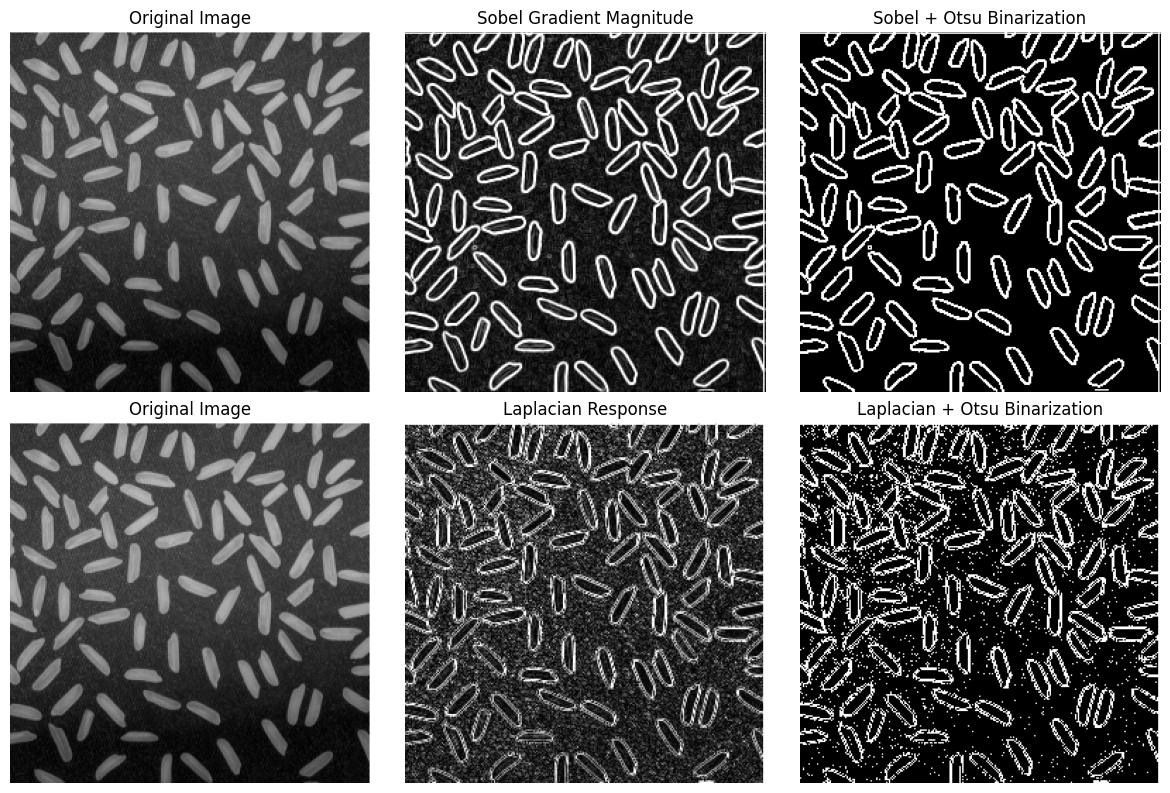

In [81]:
rice_grayscale = cv2.imread("rice.bmp", cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator
sobel_x = cv2.Sobel(rice_grayscale, cv2.CV_16S, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(rice_grayscale, cv2.CV_16S, dx=0, dy=1, ksize=3)
sobel = cv2.magnitude(sobel_x.astype(np.float32), sobel_y.astype(np.float32))
sobel_8u = cv2.convertScaleAbs(sobel)

# Apply Laplacian operator
laplacian = cv2.Laplacian(rice_grayscale, cv2.CV_16S, ksize=3)
laplacian_8u = cv2.convertScaleAbs(laplacian)

# Apply Otsu binarization to both filters
_, sobel_bin = cv2.threshold(sobel_8u, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, laplacian_bin = cv2.threshold(laplacian_8u, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Show all steps
images = [rice_grayscale, sobel_8u, sobel_bin,
          rice_grayscale, laplacian_8u, laplacian_bin]
titles = ["Original Image", "Sobel Gradient Magnitude", "Sobel + Otsu Binarization",
          "Original Image", "Laplacian Response", "Laplacian + Otsu Binarization"]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## Lane Detection on Video Frames

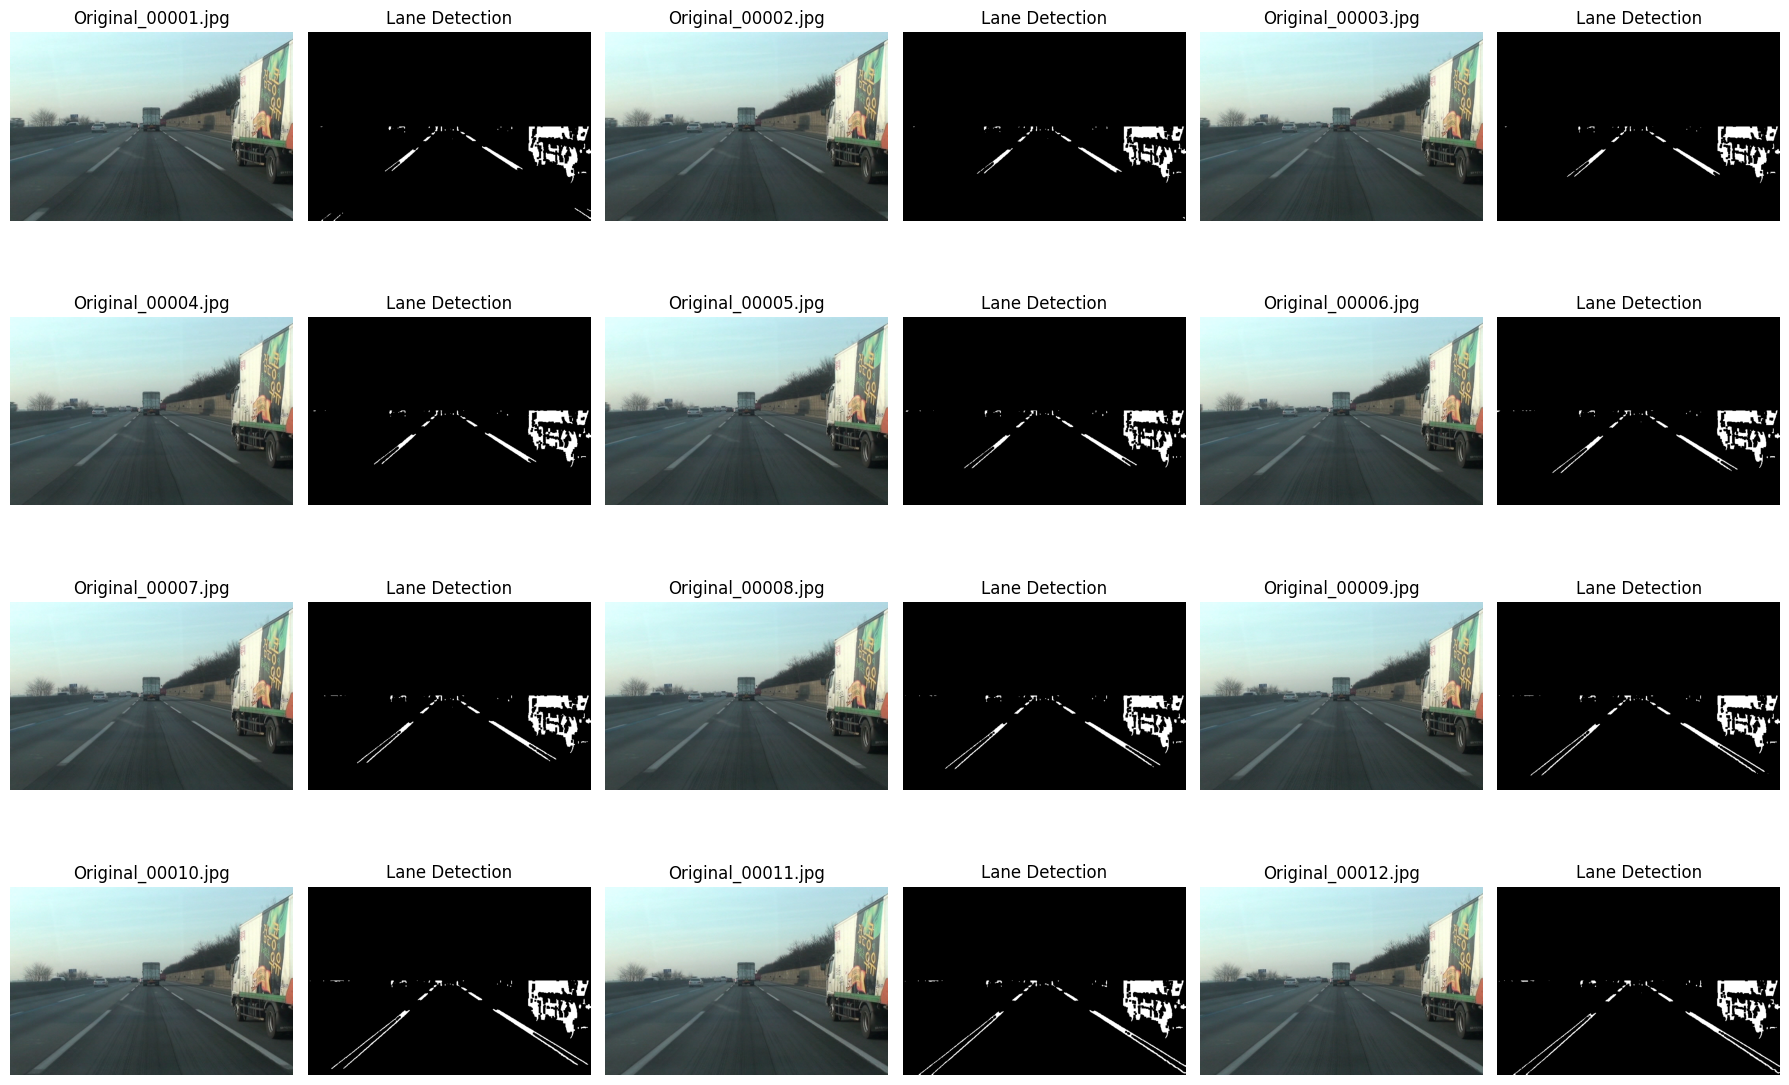

In [82]:
import os
import glob

# Get image file paths (00001.jpg to 00012.jpg) from "Lane1" folder
img_dir = "Lane1"
img_paths = sorted(glob.glob(os.path.join(img_dir, "000*.jpg")))

def detect_lane(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Sobel operator to highlight horizontal intensity changes (vertical edges)
    sobel = cv2.Sobel(blur, cv2.CV_64F, dx=1, dy=0, ksize=3)
    sobel_abs = cv2.convertScaleAbs(sobel)

    # Select bottom half as Region of Interest (ROI)
    height, width = sobel_abs.shape
    roi = np.zeros_like(sobel_abs)
    roi[int(height * 0.5):, :] = sobel_abs[int(height * 0.5):, :]

    # (Optional) Remove right 25% area — can be used to eliminate truck
    # roi[:, int(width * 0.75):] = 0

    # Apply Otsu's thresholding to detect strong edges
    _, binary = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Morphological Closing to remove small holes and connect lines
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    clean = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    return clean


# -------- Display Lane Detection Results --------

plt.figure(figsize=(18, 12))

for i, path in enumerate(img_paths):
    img = cv2.imread(path)
    lane_result = detect_lane(img)

    # Show original image
    plt.subplot(4, 6, i * 2 + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Original_{os.path.basename(path)}")
    plt.axis('off')

    # Show detected lanes
    plt.subplot(4, 6, i * 2 + 2)
    plt.imshow(lane_result, cmap='gray')
    plt.title("Lane Detection")
    plt.axis('off')

plt.tight_layout()
plt.show()